### Task 2.6

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/task2_data.csv')

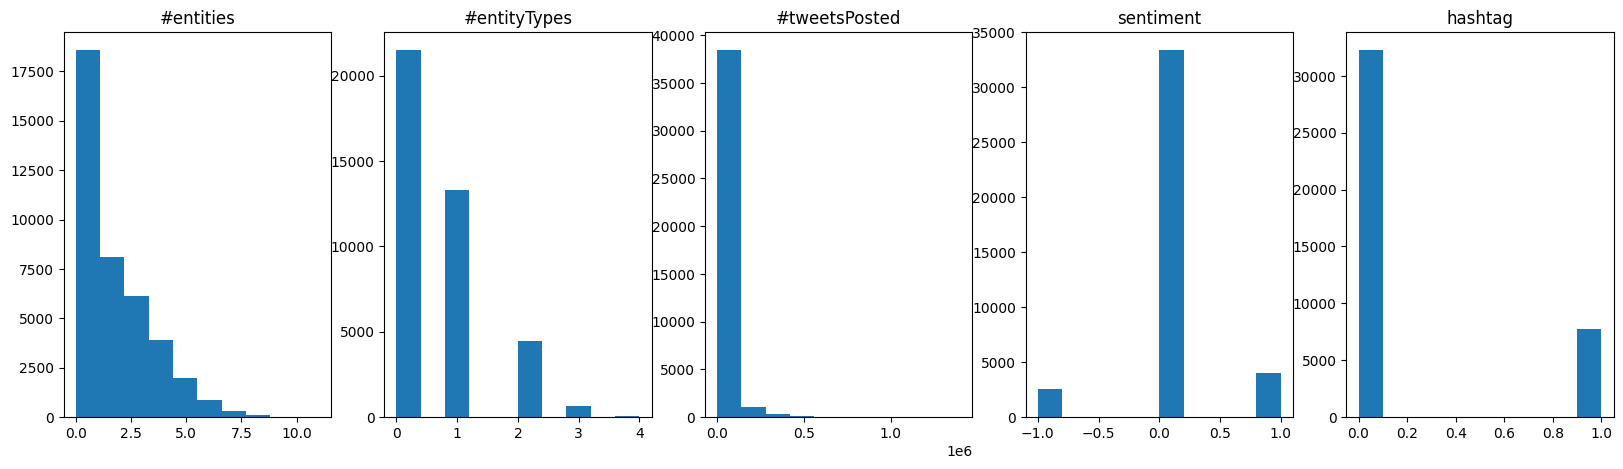

In [59]:
# Analyze the features


# Plot the features
plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 1)
plt.hist(df['#entities'])
plt.title('#entities')
plt.subplot(1, 5, 2)
plt.hist(df['#entityTypes'])
plt.title('#entityTypes')
plt.subplot(1, 5, 3)
plt.hist(df['#tweetsPosted'])
plt.title('#tweetsPosted')
plt.subplot(1, 5, 4)
plt.hist(df['sentiment'])
plt.title('sentiment')
plt.subplot(1, 5, 5)
plt.hist(df['hashtag'])
plt.title('hashtag')

plt.show()

### 2.7

In [60]:
entities_analysis = df['#entities'].describe()
entity_types_analysis = df['#entityTypes'].describe()
tweets_posted_analysis = df['#tweetsPosted'].describe()
sentiment_analysis = df['sentiment'].describe()
hashtag_analysis = df['hashtag'].describe()

# display the analysis in one table
df_analysis = pd.DataFrame({'#entities': entities_analysis,
                            '#entityTypes': entity_types_analysis,
                            '#tweetsPosted': tweets_posted_analysis,
                            'sentiment': sentiment_analysis,
                            'hashtag': hashtag_analysis})
print(df_analysis)


          #entities  #entityTypes  #tweetsPosted     sentiment       hashtag
count  39955.000000  39955.000000   3.995500e+04  39955.000000  39955.000000
mean       1.916481      0.611313   2.895754e+04      0.037242      0.193317
std        1.703847      0.758521   5.670662e+04      0.404664      0.394905
min        0.000000      0.000000   0.000000e+00     -1.000000      0.000000
25%        0.000000      0.000000   2.512000e+03      0.000000      0.000000
50%        2.000000      0.000000   1.029000e+04      0.000000      0.000000
75%        3.000000      1.000000   3.026000e+04      0.000000      0.000000
max       11.000000      4.000000   1.399152e+06      1.000000      1.000000


### Task 2.8

In [61]:
relevant_df = df[df['relevanceJudge'] == 1]
non_relevant_df = df[df['relevanceJudge'] == 0]

In [62]:
from scipy.stats import mannwhitneyu

In [63]:
def perform_test(feature, relevant_df, non_relevant_df):
    if feature in relevant_df.columns and feature in non_relevant_df.columns:
        relevant_data = relevant_df[feature].dropna()
        non_relevant_data = non_relevant_df[feature].dropna()

        if len(relevant_data) > 0 and len(non_relevant_data) > 0:
            u_stat, p_value = mannwhitneyu(relevant_data, non_relevant_data)
            if p_value < 0.05:
                result = "discriminative"
            else:
                result = "non-discriminative"
            print(f"{feature}: {result} (U = {u_stat}, p = {p_value})")
        else:
            print(f"{feature}: Insufficient data for test.")
    else:
        print(f"{feature}: Feature not found in DataFrame.")

In [64]:
for feature in ['hashtag', 'sentiment', '#tweetsPosted', '#entityTypes', '#entities']:
    perform_test(feature, relevant_df, non_relevant_df)

hashtag: non-discriminative (U = 52177514.0, p = 0.7448839924407198)
sentiment: discriminative (U = 49024653.0, p = 6.746463684428113e-18)
#tweetsPosted: discriminative (U = 55184382.0, p = 1.1039335884346776e-06)
#entityTypes: discriminative (U = 59898568.5, p = 1.6603458547298032e-46)
#entities: discriminative (U = 62036046.5, p = 1.9277452753941775e-63)
